<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import numpy as np
import pandas as pd

from translate import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from flair.models import TextClassifier
from flair.data import Sentence

In [2]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [3]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

###  `[25 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [5]:
data = pd.read_csv("../../archivos/dia_madre.csv")
data = data.sample(100)
data.head()

,tweet,date,city,lat,lon
430,@rcnradio SI AMAS A COLOMBIA NO HABLES DE POLÍ...,2021-05-06 09:51:12,Cartagena,10.399722,-75.514444
572,Quiero también felicitar en el día de la madre...,2021-05-02 12:14:01,Pereira,4.813333,-75.696111
1016,El día de la madre sin madre es uno de los día...,2021-05-03 20:30:41,Armenia,4.533889,-75.681111
250,No son ni las doce y media y ya perdí la cuent...,2021-05-04 17:13:05,Cali,3.437222,-76.522500
903,Artista Sandra Argudo brindará un concierto po...,2021-05-06 16:08:27,Neiva,2.927299,-75.281885


### Flair

In [6]:
classifier = TextClassifier.load('sentiment')

2021-05-27 13:36:11,687 loading file /Users/vivianamarquez/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [8]:
classifier = TextClassifier.load('sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sent_flair'] = data['tweet'].apply(lambda valor: sent_flair(valor))
data.head()

2021-05-27 13:36:25,954 loading file /Users/vivianamarquez/.flair/models/sentiment-en-mix-distillbert_3.1.pt


,tweet,date,city,lat,lon,sent_flair
430,@rcnradio SI AMAS A COLOMBIA NO HABLES DE POLÍ...,2021-05-06 09:51:12,Cartagena,10.399722,-75.514444,0.967599
572,Quiero también felicitar en el día de la madre...,2021-05-02 12:14:01,Pereira,4.813333,-75.696111,0.950372
1016,El día de la madre sin madre es uno de los día...,2021-05-03 20:30:41,Armenia,4.533889,-75.681111,0.990119
250,No son ni las doce y media y ya perdí la cuent...,2021-05-04 17:13:05,Cali,3.437222,-76.522500,0.717815
903,Artista Sandra Argudo brindará un concierto po...,2021-05-06 16:08:27,Neiva,2.927299,-75.281885,0.986714


In [9]:
print("Tweet más negativo")
data.sort_values('sent_flair').iloc[0]['tweet']

Tweet más negativo


'Acabo de escuchar una persona que dice, prefiero pensar que no es conmigo meterme en una cueva, no me quiero poner al día... ¿Qué? Casi muero y estallo de ira la madre!!!!\n\nNo sean tan indolentes.'

In [11]:
print("Tweet más positivo")
data.sort_values('sent_flair').iloc[-1]['tweet']

Tweet más positivo


'Gente todo bien, y si para el día de la madre todos compramos una flor y una vela en honor a todas las madres que por culpa de la violencia ya no tienen a sus hijos este año. Dando varios minutos de silencio en honor al dolor más grande del mundo.\n¿Qué opinan?'

###  `[Extra]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [12]:
data['sent_flair_label'] = data['sent_flair'].apply(lambda valor: 'POSITIVO' if valor >=0 else 'NEGATIVO')

In [13]:
data['sent_flair_label'].value_counts()

POSITIVO    68
NEGATIVO    32
Name: sent_flair_label, dtype: int64

###  `[Extra]` : Diagrama de barras de la pregunta 3

In [14]:
temp = pd.DataFrame(data['sent_flair_label'].value_counts()).reset_index()
temp.columns = ['sentimiento', 'cuántos']
temp

,sentimiento,cuántos
0,POSITIVO,68
1,NEGATIVO,32


In [15]:
trace = go.Bar(x=temp.sentimiento.values,
               y=temp.cuántos.values,
               marker=dict(color=["blue","orange"]))

layout = go.Layout(title='Sentimientos')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [21]:
stopwords.extend(["https", "co"])

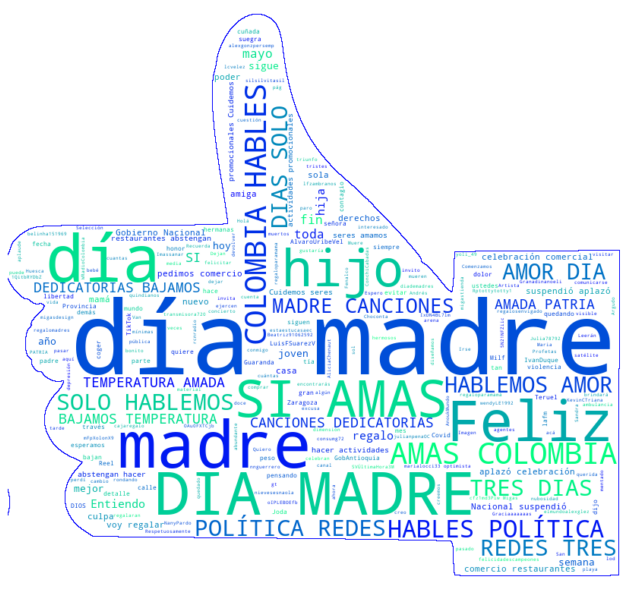

In [22]:
up = PIL.Image.open("../../img/clase13/up.png")
mask = np.array(up)

palabras = data[data['sent_flair_label']=='POSITIVO'].tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='winter',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='blue').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

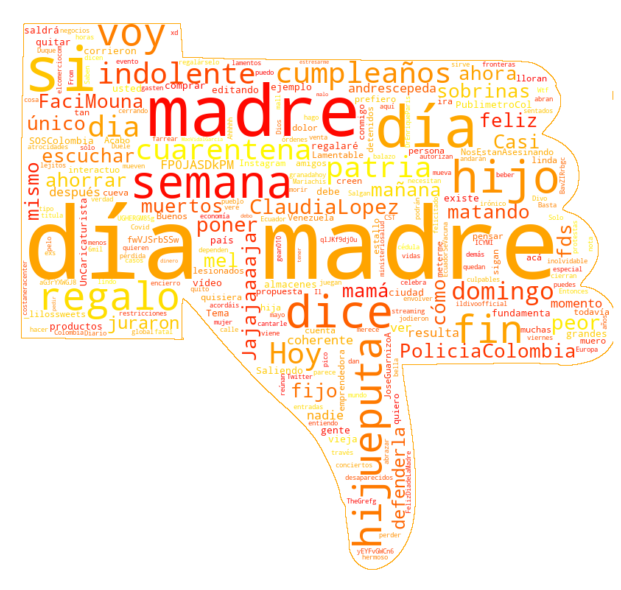

In [23]:
down = PIL.Image.open("../../img/clase13/down.png")
mask = np.array(down)

palabras = data[data['sent_flair_label']=='NEGATIVO'].tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='autumn',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()